In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

In [2]:
data = pd.read_csv('fullevents.csv',index_col='EventTime')
data = data.dropna(subset=['EventOrigin_x','EventOrigin_y','EventDestination_x','EventDestination_y'])



In [3]:
shadow=5
colordic = dict(zip(data['EventType'].unique(),sns.color_palette(n_colors=len(data['EventType'].unique())).as_hex()))
patches = [mpatches.Patch(label=i,color=colordic[i]) for i in colordic.keys()]
def gen_pic(data1,matchid,matchperiod,shadow=5):
    shals_hu=[]
    shals_opp=[]
    data1_hu=data1[data1['TeamID']=='Huskies']
    data1_opp=data1[data1['TeamID']!='Huskies']
    for i in data1.index:
        plt.clf()
        if i in data1_hu.index:
            shals_hu.append(i)
            if len(shals_hu) >= shadow:
                shals_hu = shals_hu[1:]
        for j in shals_hu:
            plt.scatter([data1_hu['EventOrigin_x'][j],data1_hu['EventDestination_x'][j]],[data1_hu['EventOrigin_y'][j],data1_hu['EventDestination_y'][j]],c='black')
            plt.plot([data1_hu['EventOrigin_x'][j],data1_hu['EventDestination_x'][j]],[data1_hu['EventOrigin_y'][j],data1_hu['EventDestination_y'][j]],
                     c=colordic[data1_hu['EventType'][j]])
            # print(shals_hu)
        if i in data1_opp.index:
            shals_opp.append(i)
            if len(shals_opp)>=shadow:
                shals_opp=shals_opp[1:]

        for j in shals_opp:
            plt.scatter([data1_opp['EventOrigin_x'][j],data1_opp['EventDestination_x'][j]],[data1_opp['EventOrigin_y'][j],data1_opp['EventDestination_y'][j]],
                        c='w',edgecolors='black')
            plt.plot([data1_opp['EventOrigin_x'][j],data1_opp['EventDestination_x'][j]],[data1_opp['EventOrigin_y'][j],data1_opp['EventDestination_y'][j]],
                     c=colordic[data1_opp['EventType'][j]])
        plt.xlim(0,max(max(data1['EventOrigin_x']),max(data1['EventDestination_x']))*1.1)
        plt.ylim(0,max(max(data1['EventOrigin_y']),max(data1['EventDestination_y']))*1.1)
        plt.title("time=%.2f"%i)
        plt.subplots_adjust(right=0.65)
        plt.legend(handles=patches,bbox_to_anchor=(1.05, 0),loc=3)
        plt.savefig('./%d_%s/%d_%s_%07.2f.jpg'%(matchid,matchperiod,matchid,matchperiod,i))
    print(matchperiod)

1H
2H
1H
2H
1H
2H
1H
2H
1H
2H
1H
2H
1H
2H
1H
2H
1H
2H
1H
2H
1H
2H
1H
2H
1H
2H
1H
2H
1H
2H
1H
2H
1H
2H
1H
2H
1H
2H
1H
2H
1H
2H
1H
2H
1H
2H
1H
2H
1H
2H
1H
2H
1H
2H
1H
2H
1H
2H
1H
2H
1H
2H
1H
2H
1H
2H
1H
2H
1H
2H
1H
2H
1H
2H
1H
2H


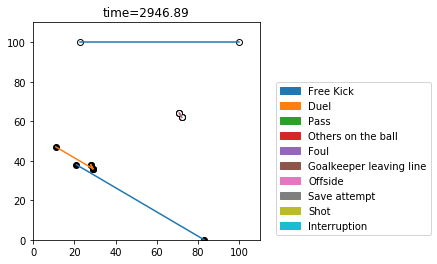

In [4]:

for i in data['MatchID'].unique():
    data1=data[data['MatchID']==i]
    gen_pic(data1[data1['MatchPeriod']=='1H'],i,'1H',shadow)
    gen_pic(data1[data1['MatchPeriod']=='2H'],i,'2H',shadow)

In [5]:
import os
# for i in data['MatchID'].unique():
#     if i==1:
#         continue
#     os.mkdir('./%d_1H'%i)
#     os.mkdir('./%d_2H'%i)

In [7]:
import cv2
import os
# fourcc=cv2.VideoWriter_fourcc(*"mp4v")
def img_to_video(matchid,matchperiod):
    fps=2
    perfix='%d_%s'%(matchid,matchperiod)
    video = cv2.VideoWriter('videos/'+perfix+'.mp4', cv2.VideoWriter_fourcc(*"mp4v"), fps, (432,288))
    for i in sorted(os.listdir('imgs/'+perfix)) :
        if i.find('jpg')==-1:
            continue
        image=cv2.imread('imgs/'+perfix+'/'+i)
        video.write(image)
        print("ok")
    video.release()
# cv2.waitKey()

In [8]:
for i in data['MatchID'].unique():
    img_to_video(i,'1H')
    img_to_video(i,'2H')


ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
o